In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi

Mon Mar  6 11:48:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    26W /  70W |    333MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
tf.__version__


'2.11.0'

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders=glob('/content/drive/MyDrive/Dataset/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Dataset/train/Positive',
 '/content/drive/MyDrive/Dataset/train/Negative']

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 620 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-18-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
39/39 [==============================] - 265s 6s/step - loss: 1.4484 - accuracy: 0.8210 - val_loss: 2.7940 - val_accuracy: 0.5300
Epoch 2/10
39/39 [==============================] - 10s 269ms/step - loss: 0.8614 - accuracy: 0.8952 - val_loss: 0.7508 - val_accuracy: 0.8050
Epoch 3/10
39/39 [==============================] - 10s 252ms/step - loss: 0.4812 - accuracy: 0.9306 - val_loss: 0.6499 - val_accuracy: 0.8450
Epoch 4/10
39/39 [==============================] - 10s 251ms/step - loss: 0.8120 - accuracy: 0.9081 - val_loss: 5.3576 - val_accuracy: 0.5050
Epoch 5/10
39/39 [==============================] - 10s 265ms/step - loss: 0.6697 - accuracy: 0.9290 - val_loss: 3.1076 - val_accuracy: 0.5400
Epoch 6/10
39/39 [==============================] - 10s 264ms/step - loss: 0.3173 - accuracy: 0.9516 - val_loss: 0.9362 - val_accuracy: 0.8500
Epoch 7/10
39/39 [==============================] - 10s 248ms/step - loss: 0.5031 - accuracy: 0.9371 - val_loss: 1.7071 - val_accuracy: 0.7050
E

In [ ]:
import matplotlib.pyplot as plt

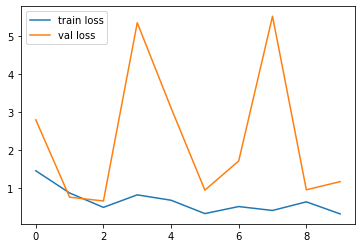

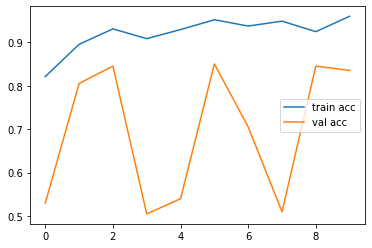

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

13/13 [==============================] - 3s 59ms/step


In [ ]:
y_pred

array([[4.87890035e-01, 5.12109935e-01],
       [1.71373380e-04, 9.99828577e-01],
       [7.02884495e-01, 2.97115535e-01],
       [9.68317926e-01, 3.16820927e-02],
       [4.16591996e-03, 9.95834112e-01],
       [5.14272006e-35, 1.00000000e+00],
       [8.00433874e-01, 1.99566141e-01],
       [9.61982548e-01, 3.80174480e-02],
       [6.79030483e-32, 1.00000000e+00],
       [9.96600926e-01, 3.39912320e-03],
       [9.75094557e-01, 2.49054451e-02],
       [5.30313428e-35, 1.00000000e+00],
       [9.99996424e-01, 3.57290628e-06],
       [4.14835630e-34, 1.00000000e+00],
       [9.99247849e-01, 7.52073189e-04],
       [9.63288694e-14, 1.00000000e+00],
       [9.80982304e-01, 1.90177709e-02],
       [0.00000000e+00, 1.00000000e+00],
       [2.09842220e-27, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [6.70983374e-01, 3.29016626e-01],
       [1.08589570e-03, 9.98914123e-01],
       [1.42385844e-23, 1.00000000e+00],
       [2.07783151e-02, 9.79221642e-01],
       [8.118521

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0])

In [ ]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')


In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/predict/IMG_1129.JPG',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x


array([[[215., 215., 217.],
        [215., 216., 218.],
        [216., 217., 219.],
        ...,
        [212., 212., 214.],
        [212., 210., 213.],
        [210., 210., 212.]],

       [[214., 215., 217.],
        [214., 214., 216.],
        [215., 215., 217.],
        ...,
        [209., 207., 210.],
        [210., 208., 211.],
        [215., 213., 216.]],

       [[213., 214., 216.],
        [214., 214., 216.],
        [215., 215., 217.],
        ...,
        [212., 210., 213.],
        [205., 203., 206.],
        [209., 207., 210.]],

       ...,

       [[177., 176., 174.],
        [184., 183., 181.],
        [182., 181., 179.],
        ...,
        [190., 190., 190.],
        [188., 188., 190.],
        [186., 186., 188.]],

       [[186., 185., 183.],
        [184., 183., 181.],
        [176., 175., 173.],
        ...,
        [188., 188., 188.],
        [189., 189., 191.],
        [172., 172., 174.]],

       [[170., 169., 167.],
        [187., 186., 184.],
        [181., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[0.9942595 , 0.00574055]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 38ms/step


In [ ]:
a

array([0])

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/test/Positive/DJI_0677_10_16.jpg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[149., 152., 143.],
        [146., 149., 140.],
        [144., 147., 138.],
        ...,
        [156., 157., 151.],
        [156., 157., 151.],
        [156., 157., 151.]],

       [[143., 146., 137.],
        [143., 146., 137.],
        [145., 148., 139.],
        ...,
        [156., 157., 151.],
        [156., 157., 151.],
        [156., 157., 151.]],

       [[138., 141., 132.],
        [142., 145., 136.],
        [147., 150., 141.],
        ...,
        [156., 157., 151.],
        [156., 157., 151.],
        [156., 157., 151.]],

       ...,

       [[154., 155., 149.],
        [152., 153., 147.],
        [147., 148., 142.],
        ...,
        [137., 137., 127.],
        [139., 139., 129.],
        [140., 140., 130.]],

       [[155., 156., 150.],
        [158., 159., 153.],
        [156., 157., 151.],
        ...,
        [135., 135., 125.],
        [136., 136., 126.],
        [137., 137., 127.]],

       [[155., 156., 150.],
        [162., 163., 157.],
        [163., 1

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 51ms/step


array([[0.00107503, 0.9989249 ]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 32ms/step


array([1])